# Diagnose data for cleaning

## Cleaning data
- Prepare data for analysis
- Data almost never comes in clean
- Diagnose your data for problems

## Common data problems
- Inconsistent column names
- Missing data
- Outliers
- Duplicate rows
- Untidy
- Need to process columns
- Column types can signal unexpected data values

### Loading and viewing your data
In this chapter, you're going to look at a subset of the Department of Buildings Job Application Filings dataset from the [NYC Open Data portal][1]. This dataset consists of job applications filed on January 22, 2017.

Your first task is to load this dataset into a DataFrame and then inspect it using the `.head()` and `.tail()` methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns. Therefore, you need to look at the data in another way.

The `.shape` and `.columns` attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data. To this end, a new DataFrame, `df_subset`, consisting only of these relevant columns, has been pre-loaded. This is the DataFrame you'll work with in the rest of the chapter.

Get acquainted with the dataset now by exploring it with pandas! This initial exploratory analysis is a crucial first step of data cleaning.

[1]:http://opendata.cityofnewyork.us/

In [1]:
filepath = '../_datasets/'
filename = 'dob_job_application_filings_subset.csv'

In [2]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv(filepath+filename, low_memory=False)

In [3]:
# Print the head of df
df.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
0,121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,38,1016890,A2,D,...,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
1,520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,...,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
2,121601560,1,MANHATTAN,63,WEST 131 STREET,1729,9,1053831,A2,Q,...,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
3,121601203,1,MANHATTAN,48,WEST 25TH STREET,826,69,1015610,A2,D,...,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
4,121601338,1,MANHATTAN,45,WEST 29 STREET,831,7,1015754,A3,D,...,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM


In [4]:
# Print the tail of df
df.tail()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
12841,520143988,1,STATEN ISLAND,8,NOEL STREET,5382,20,5069722,A2,D,...,MALITO,GENO MALITO,8,NOEL STREET,STATEN ISLAND,NY,10312,9174685659,HORIZONTAL ENLARGEMENT OF ATTACHED ONE CAR GAR...,06/13/2013 12:00:00 AM
12842,121613833,1,MANHATTAN,724,10 AVENUE,1059,4,1082503,A2,D,...,CROMAN,722-724 10TH AVENUE HOLDING LLC,632,BROADWAY,NEW YORK,NY,10012,2122289300,RENOVATION OF EXISTING APARTMENT #3B ON THIRD ...,06/13/2013 12:00:00 AM
12843,121681260,1,MANHATTAN,350,MANHATTAN AVE.,1848,31,1055849,A2,A,...,ARYEH,DG UWS LLC,619,WEST 54TH STREET,NEW YORK,NY,10019,2127652555,REPLACE BURNER IN EXSTG BOILER WITH NEW GAS BU...,06/13/2013 12:00:00 AM
12844,320771704,1,BROOKLYN,499,UNION STREET,431,43,3007185,A2,D,...,WIGGINS,N/A,77,PROSPECT PLACE,BROOKLYN,NY,11217,9178487799,INSTALL NEW SPRINKLER SYSTEM THROUGHOUT THE BU...,06/13/2013 12:00:00 AM
12845,520143951,1,STATEN ISLAND,1755,RICHMOND ROAD,887,28,5022931,A2,D,...,CAMBRIA,RONALD CAMBRIA,1755,RICHMOND ROAD,STATEN ISLAND,NY,10304,7184482740,INTERIOR PARTITIONS AND MINOR PLUMBING WORK TO...,06/13/2013 12:00:00 AM


In [5]:
# Print the shape of df
print('shape:',df.shape)

# Print the columns of df
print(df.columns)

shape: (12846, 82)
Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'Existing

In [6]:
df_subset = df[['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 'Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height']]

In [7]:
df_subset.head()

,Job #,Doc #,Borough,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
0,121577873,2,MANHATTAN,$75000.00,$986.00,0,0,0,0,0,0,0,0
1,520129502,1,STATEN ISLAND,$0.00,$1144.00,0,0,0,143,0,0,0,0
2,121601560,1,MANHATTAN,$30000.00,$522.50,0,0,0,0,5,5,54,54
3,121601203,1,MANHATTAN,$1500.00,$225.00,0,0,0,0,12,12,120,120
4,121601338,1,MANHATTAN,$19500.00,$389.50,0,0,0,0,6,6,64,64


In [8]:
df_subset.tail()

,Job #,Doc #,Borough,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
12841,520143988,1,STATEN ISLAND,$30700.00,$448.62,1490,1782,206,0,1,1,10,10
12842,121613833,1,MANHATTAN,$62000.00,$852.10,0,0,0,0,5,5,55,55
12843,121681260,1,MANHATTAN,$166000.00,$1923.30,0,0,0,0,6,6,64,64
12844,320771704,1,BROOKLYN,$65000.00,$883.00,0,0,0,0,1,1,18,18
12845,520143951,1,STATEN ISLAND,$9500.00,$316.50,0,0,0,0,1,1,18,18


### Further diagnosis
In the previous exercise, you identified some potentially unclean or missing data. Now, you'll continue to diagnose your data with the very useful `.info()` method.

The `.info()` method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column. This is the kind of information that will allow you to confirm whether the `'Initial Cost'` and `'Total Est. Fee'` columns are numeric or strings. From the results, you'll also be able to see whether or not all columns have complete data in them.

The full DataFrame `df` and the subset DataFrame `df_subset` have been pre-loaded. Your task is to use the `.info()` method on these and analyze the results.

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

In [10]:
# Print the info of df_subset
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.1+ MB
None


Notice that the columns `'Initial Cost'` and `'Total Est. Fee'` are of type `object`. The currency sign in the beginning of each value in these columns needs to be removed, and the columns need to be converted to numeric. In the full DataFrame, note that there are a lot of missing values. You saw in the previous exercise that there are also a lot of `0` values. Given the amount of data that is missing in the full dataset, it's highly likely that these `0` values represent missing data.

## Exploratory data analysis

### Calculating summary statistics
You'll now use the `.describe()` method to calculate summary statistics of your data.

In this exercise, the columns `'Initial Cost'` and `'Total Est. Fee'` must be cleaned. That is, the dollar sign must be removed and they be converted into two new numeric columns: `initial_cost` and `total_est_fee`. It's also worth noting that some columns such as Job # are encoded as numeric columns, but it does not make sense to compute summary statistics for such columns.

This cleaned DataFrame has been pre-loaded as df. Your job is to use the .describe() method on it

In [11]:
import numpy as np
df_old = df
df['initial_cost'] = pd.to_numeric([x.strip('$') for x in df['Initial Cost']])
df['total_est_fee'] = pd.to_numeric([x.strip('$') for x in df['Total Est. Fee']])
df.initial_cost.head()

0    75000.0
1        0.0
2    30000.0
3     1500.0
4    19500.0
Name: initial_cost, dtype: float64

In [12]:
df.initial_cost.describe()

count    1.284600e+04
mean     1.803139e+05
std      7.961524e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.597500e+04
75%      6.790500e+04
max      9.003000e+08
Name: initial_cost, dtype: float64

In [13]:
df['Proposed No. of Stories'].describe()

count    12846.000000
mean         8.144325
std         11.843492
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max        102.000000
Name: Proposed No. of Stories, dtype: float64

### Frequency counts for categorical data
As you've seen, `.describe()` can only be used on numeric columns. So how can you diagnose data issues when you have categorical data? One way is by using the `.value_counts()` method, which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called `dropna` which is `True` by default. What this means is if you have missing data in a column, it will not give a frequency count of them. You want to set the `dropna` column to `False` so if there are missing values in a column, it will give you the frequency counts.

In this exercise, you're going to look at the `'Borough'`, `'State'`, and `'Site Fill'` columns to make sure all the values in there are valid. When looking at the output, do a sanity check: Are all values in the `'State'` column from NY, for example? Since the dataset consists of applications filed in NY, you would expect this to be the case.

In [14]:
# Print the value counts for 'Borough'
df['Borough'].value_counts(dropna=False)

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

In [15]:
# Print the value_counts for 'State'
df['State'].value_counts(dropna=False)

NY    12391
NJ      241
PA       38
CA       20
OH       19
IL       17
FL       17
CT       16
TX       13
TN       10
MD        7
DC        7
GA        6
KS        6
MA        6
VA        5
CO        4
AZ        3
MN        3
WI        3
SC        3
RI        2
NC        2
UT        2
VT        1
MI        1
IN        1
NM        1
WA        1
Name: State, dtype: int64

In [16]:
# Print the value counts for 'Site Fill'
df['Site Fill'].value_counts(dropna=False)

NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64

Notice how not all values in the `'State'` column are NY. This is an interesting find, as this data is supposed to consist of applications filed in NYC. Curiously, all the `'Borough'` values are correct. A good start as to why this may be the case would be to find and look at the codebook for this dataset. Also, for the `'Site Fill'` column, you may or may not need to recode the NOT APPLICABLE values to `NaN` in your final analysis.

## Summary statistics
- Numeric columns
- Outliers
    - Considerably higher or lower
    - Require further investigation

### Visualizing single variables with histograms
Up until now, you've been looking at descriptive statistics of your data. One of the best ways to confirm what the numbers are telling you is to `plot` and visualize the data.

You'll start by visualizing single variables using a **histogram for numeric values**. The column you will work on in this exercise is `'Existing Zoning Sqft'`.

The `.plot()` method allows you to create a plot of each column of a DataFrame. The `kind` parameter allows you to specify the type of plot to use - `kind='hist'`, for example, plots a histogram.

In the IPython Shell, begin by computing summary statistics for the `'Existing Zoning Sqft'` column using the `.describe()` method. You'll notice that there are extremely large differences between the min and max values, and the plot will need to be adjusted accordingly. **_In such cases, it's good to look at the plot on a log scale_**. The keyword arguments `logx=True` or `logy=True` can be passed in to `.plot()` depending on which axis you want to rescale.

Finally, note that Python will render a plot such that the axis will hold all the information. That is, **if you end up with large amounts of whitespace in your plot, it indicates counts or values too small to render**.

In [17]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Describe the column
df['Existing Zoning Sqft'].describe()

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64

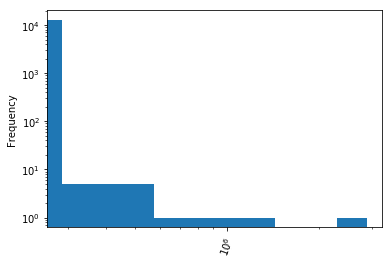

In [18]:
# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)
    # parameter rot Rotate the axis labels by the amount of degrees desired
# Display the histogram
plt.show()

While visualizing your data is a great way to understand it, keep in mind that no one technique is better than another. As you saw here, you still needed to look at the summary statistics to help understand your data better. You expected a large amount of counts on the left side of the plot because the 25th, 50th, and 75th percentiles have a value of `0`. The plot shows us that there are barely any counts near the `max` value, **_signifying an outlier_**.

### Visualizing multiple variables with boxplots
Histograms are great ways of visualizing single variables. To visualize multiple variables, `boxplots` are useful, especially when one of the variables is categorical.

In this exercise, your job is to use a boxplot to compare the `'initial_cost'` across the different values of the `'Borough'` column. The pandas `.boxplot()` method is a quick way to do this, in which you have to specify the column and by parameters. Here, you want to visualize how `'initial_cost'` varies by `'Borough'`.

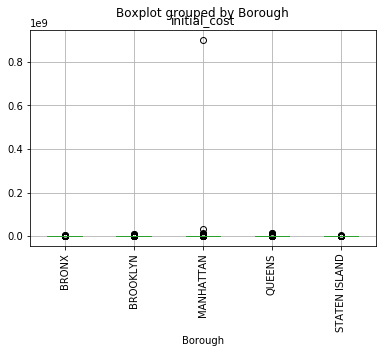

In [19]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show()

You can see the 2 extreme outliers are in the borough of Manhattan. An initial guess could be that since land in Manhattan is extremely expensive, these outliers may be valid data points. Again, further investigation is needed to determine whether or not you can drop or keep those points in your data.

### Visualizing multiple variables with scatter plots
**Boxplots** are great when you have a numeric column that you want to compare across different categories. When you want to visualize two numeric columns, **scatter plots** are ideal.

In this exercise, your job is to make a scatter plot with `'initial_cost'` on the x-axis and the `'total_est_fee'` on the y-axis. You can do this by using the DataFrame `.plot()` method with `kind='scatter'`. You'll notice right away that there are 2 major outliers shown in the plots.

Since these outliers dominate the plot, an additional DataFrame, `df_subset`, has been provided, in which some of the extreme values have been removed. After making a scatter plot using this, you'll find some interesting patterns here that would not have been seen by looking at summary statistics or 1 variable plots.

When you're done, you can cycle between the two plots by clicking the 'Previous Plot' and 'Next Plot' buttons below the plot.

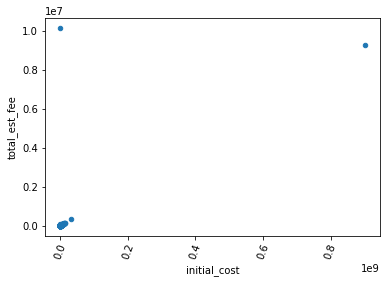

In [20]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

In [21]:
df_subset = df
# Getting the outlier from initial_cost
outliers = (df_subset.initial_cost == max(df_subset.initial_cost)) | (df_subset.total_est_fee == max(df_subset.total_est_fee))
df_subset[outliers]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate,initial_cost,total_est_fee
1483,402889843,1,QUEENS,360,SENECA AVENUE,3425,7,4081749,NB,D,...,30-30,THOMSON AVENUE,L.I.C.,NY,11101,7184728526,P.S. 320 - Q : PROPOSING FOR THE CONSTRUCTION ...,05/01/2013 12:00:00 AM,0.0,10140000.0
4233,121526303,1,MANHATTAN,462,FIRST AVENUE,962,100,1086515,A2,D,...,462,FIRSR AVENUE,NY,NY,10016,2125626835,"NEW FLOORING, NEW CEILING, NEW PARTIONS. NO C...",05/11/2013 12:00:00 AM,900300000.0,9273303.5


In [22]:
#Printing the shape before removing the outliers
print (df_subset.shape)

#Removing the outliers
df_subset.drop(df_subset.index[outliers],inplace=True)

#Printing the shape after removing the outliers
print (df_subset.shape)

(12846, 84)
(12844, 84)


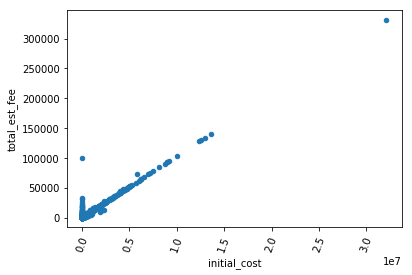

In [23]:
# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

In [24]:
#Printing the shape before removing the outliers
print (df_subset.shape)

#Removing the outliers
df_subset.drop(df_subset.index[df_subset.initial_cost > 20000000],inplace=True)

#Printing the shape after removing the outliers
print (df_subset.shape)

(12844, 84)
(12843, 84)


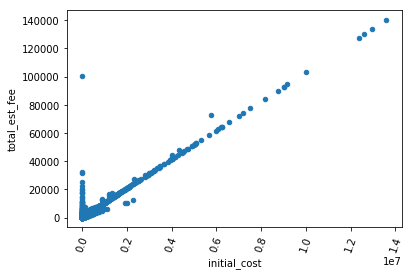

In [25]:
# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

In general, from the second and third plot it seems like there is a strong correlation between `'initial_cost'` and `'total_est_fee'`. In addition, take note of the large number of points that have an `'initial_cost'` of 0. It is difficult to infer any trends from the first plot because **it is dominated by the outliers**.